# **Credit Card Fraud Detection using Machine Learning**
### **Project Information:** 
|**Field**              |    **Details**            |   
|-----------------------|---------------------------|
|**Project ID:**        |#CC69844                   |
|**Project Title:**     |Credit Card Fraud Detection|
|**Internship Domain:** |Data Science Intern        |
|**Project Level:**     |Intermediate Level         |
|**Assigned By:**       |CodeClause Internship      |
|**Assigned To:**       |Prince Raj                 |
|**Duration:**          |01 July 2025 – 31 July 2025|


##  **Step 1: Import Essential Libraries**

#### **To begin with, I imported the necessary Python libraries for data manipulation, visualization, machine learning, and model evaluation. I’ve also included SMOTE for handling imbalance and XGBoost as the advanced classifier.**

In [1]:
import os
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

## **Step 2: Load the Dataset**

#### **The credit card fraud dataset was loaded from Kaggle using KaggleHub. This dataset contains anonymized transaction features along with a binary fraud label.**


In [2]:
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /home/prince-raj/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [3]:
# Loading the dataset to start analyzing transactions
csv_file_path = os.path.join(path, 'creditcard.csv')
df = pd.read_csv(csv_file_path)

<font size=5>**Step3: EDA (Exploratory Data Analysis)**</font>


#### **Just checking how the dataset looks initially. Useful for verifying the structure and columns.**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **I printed the shape to confirm how many rows and columns I'm working with.**

In [5]:
# Checking how many rows and columns are in the dataset
print("Dataset Shape:",df.shape)

Dataset Shape: (284807, 31)


#### **This gives a statistical overview like mean, std, min, max for each feature. Even though the data is PCA-transformed, it's still useful to understand range and outliers.**

In [6]:
# Getting a quick statistical overview of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 #### **Important to check for missing values early on.**

In [7]:
# Checking for missing values in any column
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### **I checked what the target labels are — expecting only 0 (non-fraud) and 1 (fraud).**

In [8]:
print("Unique values in 'Class':", df['Class'].unique())

Unique values in 'Class': [0 1]


#### **This gives the percentage of frauds to highlight the imbalance problem again before applying SMOTE.**

In [9]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print(f"Fraudulent: {len(fraud)} -> {(len(fraud))/len(df)*100:.2f}%")
print(f"Non-Fraudulent: {len(non_fraud)} -> {len(non_fraud)/len(df)*100:.2f}%")

Fraudulent: 492 -> 0.17%
Non-Fraudulent: 284315 -> 99.83%


#### **I plotted how imbalanced the classes are. As expected, fraud transactions are extremely rare.**

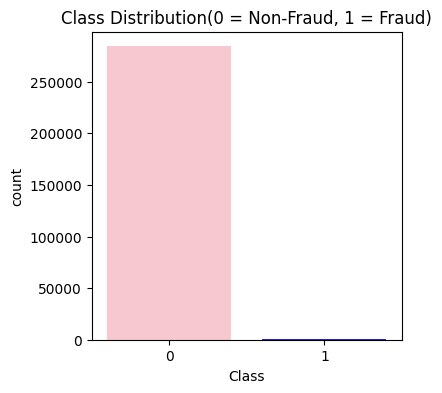

In [10]:
# Visualizing the distribution of fraud vs non-fraud cases & check if the dataset is imbalanced
plt.figure(figsize=(4, 4))
sns.countplot(x='Class', data=df, palette=['pink', 'blue'])
plt.title("Class Distribution(0 = Non-Fraud, 1 = Fraud)")
plt.show()

<font size=5>**Step 4: Feature Scaling (Time & Amount)**</font>

#### **Scale 'Amount' and 'Time' because they have wide ranges and can mislead the model.**  
#### **StandardScaler transforms them to mean=0, std=1.**
#### **I normalized the Amount and Time features and dropped the original ones. Scaling helps in better model convergence.**

In [11]:
# Scaling 'Amount' and 'Time' to match other features' scale
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Removing original 'Amount' and 'Time' after normalization
df.drop(['Amount', 'Time'], axis=1, inplace=True)

 #### **I used a boxplot to see how transaction amount varies between fraud and non-fraud cases.**

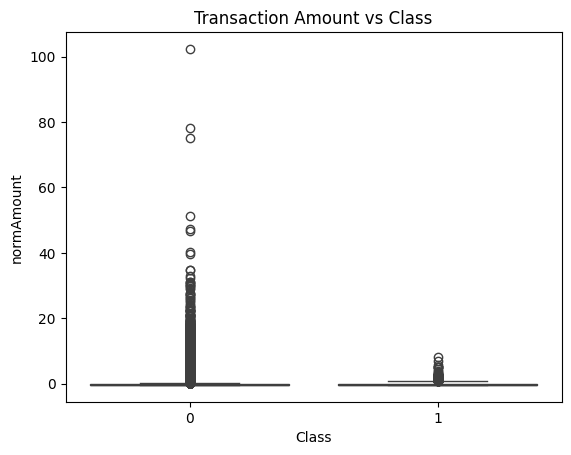

In [12]:
sns.boxplot(x='Class', y='normAmount', data=df)
plt.title('Transaction Amount vs Class')
plt.show()

<font size=5>**Step 5: Split Features & Labels**</font>

 #### **I separated features from the target column.**

In [13]:
X = df.drop('Class', axis = 1)
y = df['Class']

#### **Split the dataset into 70% training and 30% test data.**

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 <font size=5>**Step 6: Apply SMOTE**</font>

###  **Why SMOTE?**

- #### **Since fraud data is highly imbalanced, I applied SMOTE (Synthetic Minority Over-sampling Technique) only on the training data to ensure better fraud detection performance without causing data leakage.**

In [15]:
# Applying SMOTE to balance the dataset by oversampling minority class
sm = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Original Class distributions:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series((y_train_resampled).value_counts()))

Original Class distributions:
Class
0    199008
1       356
Name: count, dtype: int64

After SMOTE:
Class
0    199008
1    199008
Name: count, dtype: int64


###  **Class Distribution Before and After Applying SMOTE**

#### The dataset is highly imbalanced — the number of legitimate (Class 0) transactions far exceeds fraudulent (Class 1) ones. This imbalance can cause machine learning models to perform poorly on the minority class, as they tend to favor the majority class.

#### To address this, I used **SMOTE (Synthetic Minority Over-sampling Technique)**, which generates synthetic examples of the minority class in the training set.

- #### The **left plot** shows the class distribution before SMOTE — heavily skewed toward non-fraud (Class 0).
- #### The **right plot** shows the class distribution after SMOTE — now both classes are perfectly balanced.

#### This helps the model learn to detect fraud more effectively, without being biased toward the majority class.


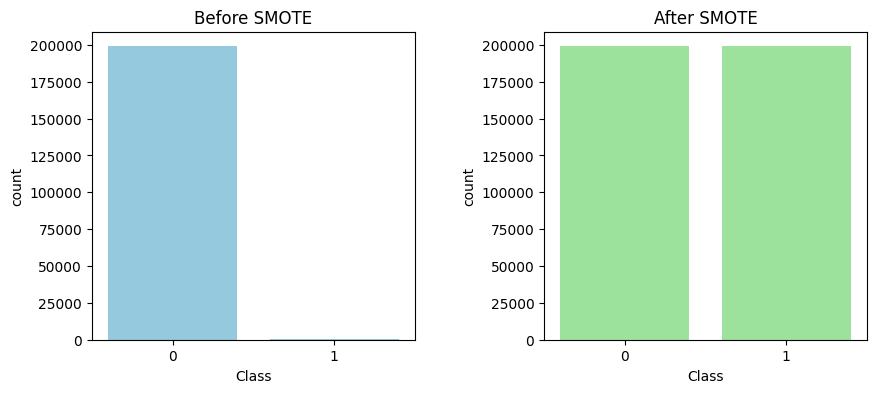

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=y_train, color='skyblue')
plt.title("Before SMOTE")

plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled,color='lightgreen')
plt.title("After SMOTE")
plt.subplots_adjust(wspace=0.4) 
plt.show()

<font size=5>**Step 7: Train Model**</font>

###  **Why XGBoost?**

- #### **I chose XGBoost for this intermediate-level task because it's a powerful, regularized gradient boosting algorithm that handles imbalanced data well and often performs better than traditional classifiers like Random Forest.**

In [17]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## **Step 8: Hyperparameter Tuning with GridSearchCV**

#### **To optimize the performance of my XGBoost model, I used **GridSearchCV** to search over multiple combinations of key hyperparameters such as `n_estimators`, `max_depth`, and `learning_rate`. The model was evaluated using **5-fold cross-validation** with **ROC AUC** as the scoring metric.**

#### **This helped identify the best-performing parameter set for more reliable and generalized fraud detection.**


In [18]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

print(f"Best Score: {grid.best_score_:.4f}")
print(f"Best Params: {grid.best_params_}")

Best Score: 0.9807
Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


## **Step 9: Feature Importance Visualization**

#### **After training the tuned XGBoost model, I plotted the feature importances to understand which variables contributed most to the predictions. This gives insight into how the model makes decisions and which features influence fraud detection the most.**


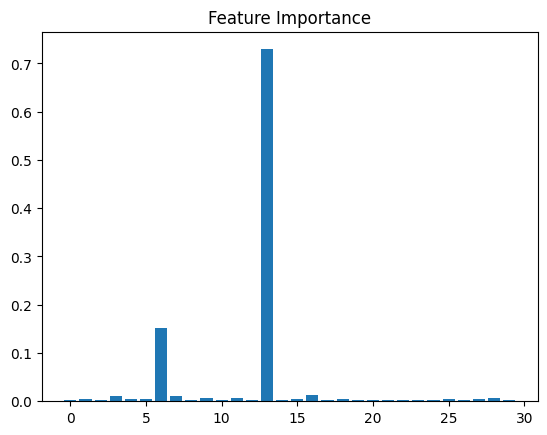

In [19]:
feat_imp = grid.best_estimator_.feature_importances_
plt.bar(range(len(feat_imp)), feat_imp)
plt.title("Feature Importance")
plt.show()

## **Step 10: Interpreting Model Predictions with SHAP**

#### **To make the model's decisions more explainable, I used **SHAP (SHapley Additive Explanations)**. The beeswarm plot below shows how each feature impacts the model’s output — both positively and negatively — across all test samples.**

#### **This adds transparency to the fraud detection system by highlighting which features push the prediction toward fraud or non-fraud.**


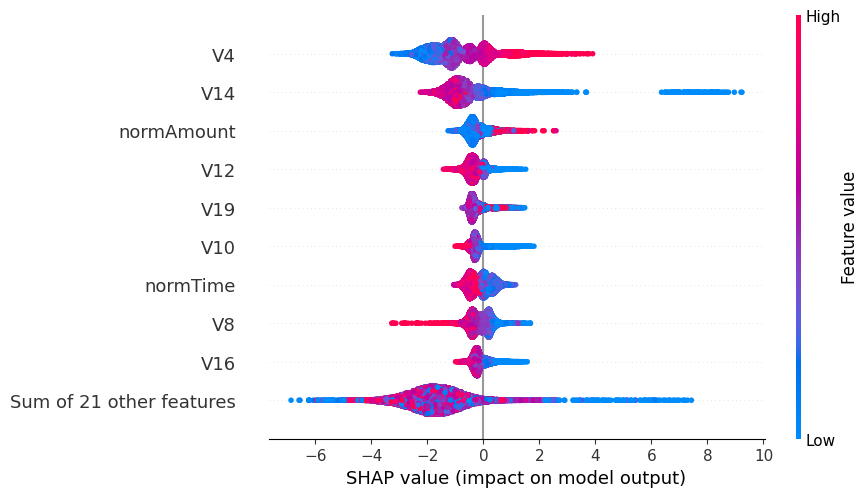

In [20]:
explainer = shap.Explainer(grid.best_estimator_)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

<font size=5>**Step 11: Predict & Evaluate**</font>

#### **The model was evaluated using accuracy, precision, recall, and AUC score. Since this is a fraud detection problem, recall and AUC were given higher priority to reduce false negatives and catch as many fraud cases as possible.**


In [21]:
pred_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.75
pred_labels = (pred_probs > threshold).astype(int)

print('Confusion Matrix:\n',confusion_matrix(y_test, pred_labels))

Confusion Matrix:
 [[85298     9]
 [   26   110]]


#### **Here's where I evaluated the model with metrics like precision, recall, and F1-score.**

In [22]:
print('Classification Report:\n',classification_report(y_test, pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.81      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### **Finally, I plotted the ROC curve and calculated the AUC score. A higher AUC indicates a better-performing model for classification tasks, especially in imbalanced data.**

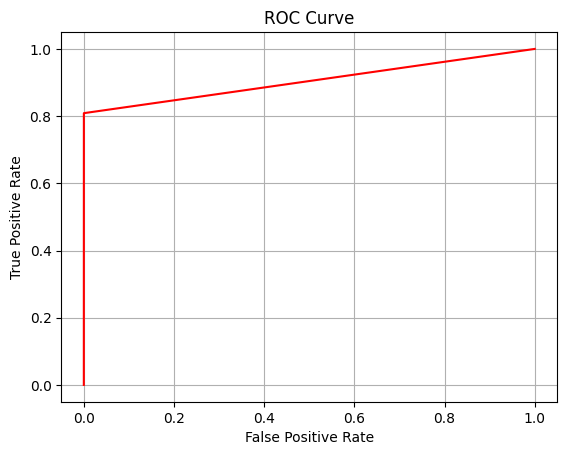

AUC Score: 0.9044


In [23]:
# Calculating true/false positive rates for ROC Curve
false_pr, true_pr, thresholds = roc_curve(y_test, pred_labels)
plt.plot(false_pr, true_pr, color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

print(f"AUC Score: {roc_auc_score(y_test, pred_labels):.4f}")

## Conclusion

- #### **In this project, I tackled fraud detection using advanced machine learning techniques.**  
- #### **I balanced the data using SMOTE, tuned an XGBoost model with GridSearchCV, and focused on interpretability using SHAP.**

- #### **The final AUC score was around **0.90**, which reflects a well-generalized model — not just high-performing, but also explainable.**

- #### **This work helped me understand how tuning, cross-validation, and feature impact analysis come together in building smarter fraud detection systems.**

- #### **This is my original submission for the **CodeClause Internship – July 2025 (Intermediate Level)**.**